In [53]:
# %load ../standard_import.txt`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# conda install -c conda-forge glmnet
# import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

#from sklearn.decomposition import PCA
#rom sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  LeaveOneOut, KFold, cross_val_score

from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline
plt.style.use('seaborn-white')

<b>(a)</b>

In [12]:
np.random.seed(0)
x = np.random.normal(size=100)
y= x - 2*(x**2)+np.random.normal(size=100)

In this dataset, and n is 100 and p is 1. The equation of this is $Y = X - 2*X^{2} + \epsilon $.

<b>(b)</b>

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)

Text(0, 0.5, 'y')

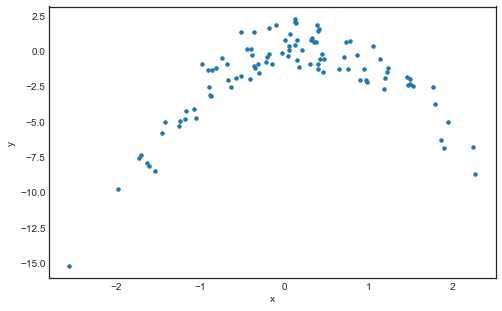

In [18]:
plt.scatter(x,y, s=12)
plt.xlabel('x') 
plt.ylabel('y')

This looks quadratic and concave down. There are more points closer to x=0 than there are farther away from x=0.

<b>(c)</b>

In [14]:
np.random.seed(2)
xc = np.random.normal(size=100)
yc= xc - 2*(xc**2)+np.random.normal(size=100)

In [97]:
df = pd.DataFrame(list(zip(xc, yc)),
               columns =['X', 'Y'])

In [98]:
p_order = np.arange(1,5)

regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df.X.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df.Y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)
scores

[-11.610208269693626,
 -1.2652839413336212,
 -1.2820418215169622,
 -1.3165915804276818]

The negative mean squred error for degree 1, 2 ,3 4, polynomial fits are about -11.6102, -1.2653, -1.2820, -1.3166, respectively.

<b>(d)</b>

In [113]:
np.random.seed(10)
xd = np.random.normal(size=100)
yd= xd - 2*(xd**2)+np.random.normal(size=100)

In [114]:
df2 = pd.DataFrame(list(zip(xd, yd)),
               columns =['X', 'Y'])

#p_order = np.arange(1,5)

regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df2)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df2.X.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df2.Y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)
scores

[-9.429508728455424,
 -1.0376998969927405,
 -1.0710664600733866,
 -1.0925510799150586]

The errors are different, but the errors of the different degrees are in the same order. For example, the 2nd degree polynomial gives the highest negative mean squred error, which makes it the best model in both simulations. The differences in each value is a result of the fact that we used a different set of randomly generated numbers.

<b>(e)</b>

The 2nd degree polynomial model had the smallest LOOCV positive mean squared error. This makes sense, because the values for Y were defined as a 2nd degree polynomial transformation of X. 

<b>(f)</b>

In [ ]:
import statsmodels.api as sm

In [132]:
poly = PolynomialFeatures(1)
X_poly = poly.fit_transform(df2.X.values.reshape(-1,1))
est = sm.OLS(df2.Y, X_poly)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.566
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0203
Time:                        15:54:04   Log-Likelihood:                -249.42
No. Observations:                 100   AIC:                             502.8
Df Residuals:                      98   BIC:                             508.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7917      0.297     -6.032      0.0

In [135]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(df2.X.values.reshape(-1,1))
est = sm.OLS(df2.Y, X_poly)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     407.4
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           6.35e-48
Time:                        15:57:29   Log-Likelihood:                -140.14
No. Observations:                 100   AIC:                             286.3
Df Residuals:                      97   BIC:                             294.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0877      0.121      0.725      0.4

In [136]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(df2.X.values.reshape(-1,1))
est = sm.OLS(df2.Y, X_poly)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.44e-46
Time:                        15:57:43   Log-Likelihood:                -140.13
No. Observations:                 100   AIC:                             288.3
Df Residuals:                      96   BIC:                             298.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0907      0.123      0.735      0.4

In [137]:
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(df2.X.values.reshape(-1,1))
est = sm.OLS(df2.Y, X_poly)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.35e-45
Time:                        15:57:50   Log-Likelihood:                -140.04
No. Observations:                 100   AIC:                             290.1
Df Residuals:                      95   BIC:                             303.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1212      0.144      0.845      0.4

The coefficients that are significant in the models, are the ones for the $X$ and $X^{2}$ terms. This makes sense since in the definition of $Y$, we had an $X$ term and an $X^{2}$ term. These results agree with the results from the LOOCV results in that the second degree polynomial model fits our data the best.